In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
%matplotlib inline


In [2]:
df_output = pd.read_csv('Data_Output_Template - Sheet1.csv')
df_output.head(10)

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN
5,1997,1,"Broadcasting, data processing, and information",NaN
6,1997,1,"Business, building and other support services",NaN
7,1997,1,Community colleges,NaN
8,1997,1,Computer systems design and related services,NaN
9,1997,1,Construction,NaN


In [3]:
df_Details = pd.read_csv('LMO_Detailed_Industries_by_NAICS - LMO_Detailed_Industry.csv')
df_Details['NAICS_Codes'] = df_Details.NAICS.astype(str).str.replace('&',',')
df_Details = df_Details.drop(columns = 'NAICS', axis = 1)

df_Details.head(10)


,LMO_Detailed_Industry,NAICS_Codes
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing","311 , 312"


creat add_date function 

In [5]:
def add_date(df1):
    datetime_str = df1.SYEAR.astype(str) + ' ' + df1.SMTH.astype(str)
    df1['DATE'] = pd.to_datetime(datetime_str).dt.strftime('%Y-%m')
    df1.set_index('DATE', inplace = True)
    return df1


In [6]:
df_output = add_date(df_output)
df_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
DATE,,,,
1997-01,1997,1,Accommodation services,NaN
1997-01,1997,1,Air transportation,NaN
1997-01,1997,1,Ambulatory health care services,NaN
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN
1997-01,1997,1,"Architectural, engineering and related services",NaN


In [7]:
df_output.dtypes

SYEAR                      int64
SMTH                       int64
LMO_Detailed_Industry     object
Employment               float64
dtype: object

In [8]:
def Clean_Raw_Data(df):
    df['NAICS_Codes'] = df.NAICS\
                        .map(lambda x:x.split('[')[1].strip(']').replace('-', ','))
    df = df.drop(columns = 'NAICS', axis = 1)[df.SYEAR < 2019]
    return df


In [9]:
df2 = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')
#df2
files_2_naics = ['RTRA_Employ_2NAICS_06_10.csv',  'RTRA_Employ_2NAICS_11_15.csv', 'RTRA_Employ_2NAICS_16_20.csv',  'RTRA_Employ_2NAICS_97_99.csv']
for i in files_2_naics:
    df = pd.read_csv(i)
    df2 = df2.append(df, ignore_index=True)
Cleanedd_df2 = Clean_Raw_Data(df2)
Cleanedd_df2 .head()
#df2 = df2[df2.NAICS.map(lambda x: len(re.findall('[0-9][0-9][0-9]', x))>0)]


,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes
0,2000,1,148000,72
1,2000,1,59250,56
2,2000,1,61750,11
3,2000,1,39500,71
4,2000,1,106250,23


In [10]:
df3 = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')
df2
files_3_naics = ['RTRA_Employ_3NAICS_06_10.csv',  'RTRA_Employ_3NAICS_11_15.csv', 'RTRA_Employ_3NAICS_16_20.csv',  'RTRA_Employ_3NAICS_97_99.csv']
for i in files_3_naics:
    df3_ = pd.read_csv(i)
    df3 = df3.append(df3_, ignore_index=True)
df3 = df3[df3.NAICS.map(lambda x: len(re.findall('[0-9][0-9][0-9]', x))>0)]

Cleanedd_df3 = Clean_Raw_Data(df3)
Cleanedd_df3.head()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_Codes
0,2000,1,500,914
1,2000,1,33750,721
2,2000,1,55250,561
3,2000,1,17500,481
4,2000,1,53000,621


In [11]:
df4 = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')
df4
files_4_naics = ['RTRA_Employ_4NAICS_06_10.csv',  'RTRA_Employ_4NAICS_11_15.csv', 'RTRA_Employ_4NAICS_16_20.csv',  'RTRA_Emply_4NAICS_97_99.csv']
for i in files_4_naics:
    df4_ = pd.read_csv(i)
    df4 = df4.append(df4_, ignore_index=True)
df4.rename(columns = {'NAICS':'NAICS_Codes'},inplace = True)
df4 = df4[df4.SYEAR < 2019]
df4 = df4.astype({'NAICS_Codes':'str'})
df4.head()

,SYEAR,SMTH,NAICS_Codes,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


In [12]:
# function defination for Merging LMO_datafile and RTRA file, 
def Merge_RTRA_and_LOM_data(cleaned_Raw_df, LMO_data):
    df = cleaned_Raw_df.merge(LMO_data, on = 'NAICS', how = 'left').dropna()
    
    # add Date Column to file
    df = add_date(df)
    return df

In [13]:
# function defination for Merging LMO_datafile and RTRA file, 
def Merge_RTRA_and_LOM_data(df, df_Details):
    df_new = df.merge(df_Details, on = 'NAICS_Codes', how = 'left').dropna()
    
    # add Date Column to file
    df_new = add_date(df_new)
    return df_new

In [14]:
out1 = Merge_RTRA_and_LOM_data(df2,df_Details)
out2 = Merge_RTRA_and_LOM_data(df3,df_Details)
out3 = Merge_RTRA_and_LOM_data(df4,df_Details)
out3.head()

,SYEAR,SMTH,NAICS_Codes,_EMPLOYMENT_,LMO_Detailed_Industry
DATE,,,,,
2000-01,2000,1,3366,5500,Ship and boat building
2000-01,2000,1,5413,26000,"Architectural, engineering and related services"
2000-01,2000,1,5415,30500,Computer systems design and related services
2000-01,2000,1,5416,15250,"Management, scientific and technical consultin..."
2000-01,2000,1,6111,89750,Elementary and secondary schools


finally merging all files 

In [15]:
#make 3 date set df2,df3,df4 one by using concat

second_data= pd.concat([out1, out2, out3])
second_data

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_Codes,LMO_Detailed_Industry
DATE,,,,,,
2000-01,2000,1,Construction [23],106250,23,Construction
2000-01,2000,1,Other services (except public administration)[81],100250,81,"Repair, personal and non-profit services"
2000-01,2000,1,"Real estate, rental and leasing [53]",37500,53,Real estate rental and leasing
2000-01,2000,1,Utilities [22],10750,22,Utilities
2000-01,2000,1,Wholesale trade [41],69500,41,Wholesale trade
...,...,...,...,...,...,...
1999-12,1999,12,NaN,30500,5415,Computer systems design and related services
1999-12,1999,12,NaN,16000,5416,"Management, scientific and technical consultin..."
1999-12,1999,12,NaN,90500,6111,Elementary and secondary schools


In [16]:
Output_df = df_output.merge(second_data, on = ['DATE', 'LMO_Detailed_Industry'], how = 'left')
Output_df.head()


,SYEAR_x,SMTH_x,LMO_Detailed_Industry,Employment,SYEAR_y,SMTH_y,NAICS,_EMPLOYMENT_,NAICS_Codes
DATE,,,,,,,,,
1997-01,1997,1,Accommodation services,NaN,1997.0,1.0,Accommodation services[721],24000.0,721
1997-01,1997,1,Air transportation,NaN,1997.0,1.0,Air transportation[481],17000.0,481
1997-01,1997,1,Ambulatory health care services,NaN,1997.0,1.0,Ambulatory health care services[621],40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN,1997.0,1.0,"Amusement, gambling and recreation industries[...",20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",NaN,1997.0,1.0,NaN,27000.0,5413


we have duplicate columns  SYEAR_y	 SMTH_y ,
 SYEAR	SMTH	 let's remove them


remove _ from employment column

In [17]:
Output_df = df_output.merge(second_data, on = ['DATE', 'LMO_Detailed_Industry'], how = 'left').drop(columns = ['SYEAR_y', 'SMTH_y', 'Employment','NAICS'], axis = 1)
Output_df.rename(columns = {'SYEAR_x': 'SYEAR', 'SMTH_x': 'SMTH', '_EMPLOYMENT_':'EMPLOYMENT'}, inplace = True)
Output_df['EMPLOYMENT'] = Output_df.EMPLOYMENT.fillna(0).astype('float64')

Output_df


,SYEAR,SMTH,LMO_Detailed_Industry,EMPLOYMENT,NAICS_Codes
DATE,,,,,
1997-01,1997,1,Accommodation services,24000.0,721
1997-01,1997,1,Air transportation,17000.0,481
1997-01,1997,1,Ambulatory health care services,40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",27000.0,5413
...,...,...,...,...,...
2018-12,2018,12,Utilities,12250.0,22
2018-12,2018,12,Warehousing and storage,8750.0,493
2018-12,2018,12,Water transportation,5000.0,483


In [18]:
#check duplicate
Output_df.duplicated().sum()

0

In [19]:
Output_df.isna().sum()

SYEAR                       0
SMTH                        0
LMO_Detailed_Industry       0
EMPLOYMENT                  0
NAICS_Codes              3432
dtype: int64

In [20]:
Output_df.dropna(subset =['NAICS_Codes'] ,inplace =True)

In [21]:
Output_df.isna().sum()

SYEAR                    0
SMTH                     0
LMO_Detailed_Industry    0
EMPLOYMENT               0
NAICS_Codes              0
dtype: int64

In [22]:
#LMO_Detailed_Industry number 
Output_df.LMO_Detailed_Industry.count()

12144

## Exploratory Data Analysis

Let's Start with industries and number of employees in it

### What is the top 20 industries?

Text(0, 0.5, 'Industry')

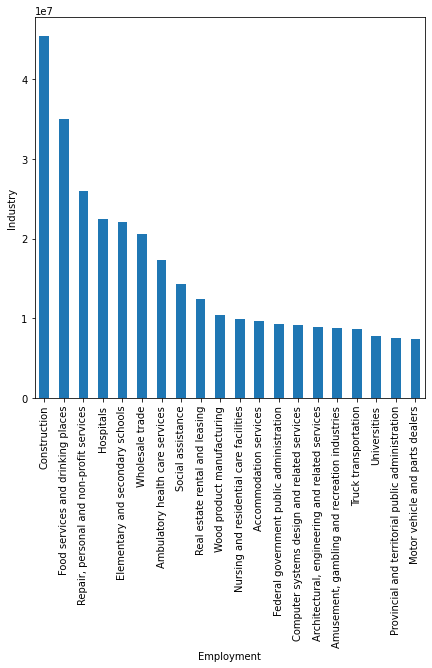

In [23]:
sumOfEmployeInIndstry = Output_df.groupby('LMO_Detailed_Industry')['EMPLOYMENT'].sum().sort_values(ascending=False);
sumOfEmployeInIndstry2 = sumOfEmployeInIndstry.head(20);

plt.figure(figsize=(7,7));
sumOfEmployeInIndstry2.plot(kind = 'bar');
plt.xlabel('Employment')
plt.ylabel('Industry')


### How employment in Construction evolved over time and how this compares to the total employment across all industries?

SYEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
SMTH,,,,,,,,,,,,,,,,,,,,,
1,118000.0,117000.0,111000.0,106250.0,97250.0,107250.0,109000.0,122500.0,157250.0,160750.0,...,200000.0,193750.0,180250.0,188750.0,196250.0,201500.0,196500.0,197250.0,213500.0,239750.0
2,120000.0,119750.0,110000.0,115000.0,103500.0,106250.0,110250.0,120000.0,155250.0,162000.0,...,196500.0,187250.0,188500.0,189000.0,198750.0,201500.0,196750.0,201750.0,221500.0,238000.0
3,116750.0,112250.0,110500.0,106750.0,108250.0,105750.0,115000.0,124250.0,155000.0,169000.0,...,190750.0,193500.0,188250.0,189500.0,191250.0,201750.0,197250.0,200750.0,218250.0,236750.0
4,125500.0,113000.0,105000.0,105500.0,111000.0,107750.0,104000.0,129500.0,161750.0,171000.0,...,199500.0,195250.0,193500.0,194750.0,192250.0,195750.0,196000.0,213250.0,223000.0,238750.0
5,123750.0,116000.0,114250.0,113500.0,116500.0,115250.0,111500.0,133750.0,160000.0,167000.0,...,206500.0,204000.0,198000.0,195250.0,205000.0,201000.0,203250.0,214500.0,227500.0,236000.0
6,124500.0,119000.0,118000.0,113000.0,122000.0,118750.0,121750.0,148500.0,169250.0,177000.0,...,203500.0,207250.0,199000.0,199000.0,206250.0,205750.0,198000.0,212750.0,236500.0,236250.0
7,128500.0,122000.0,113500.0,115500.0,128500.0,128250.0,128750.0,152250.0,174000.0,188750.0,...,212750.0,208750.0,203000.0,202250.0,214750.0,205500.0,202250.0,219000.0,239250.0,239750.0
8,128250.0,125000.0,120750.0,118000.0,121500.0,131750.0,127000.0,154500.0,176750.0,188500.0,...,212000.0,205500.0,206750.0,207500.0,211250.0,205250.0,207250.0,216750.0,237250.0,239500.0
9,127500.0,117250.0,115250.0,124000.0,115250.0,122750.0,119750.0,151250.0,164750.0,178000.0,...,210500.0,200000.0,209000.0,209500.0,214750.0,202750.0,215250.0,217500.0,229000.0,238750.0


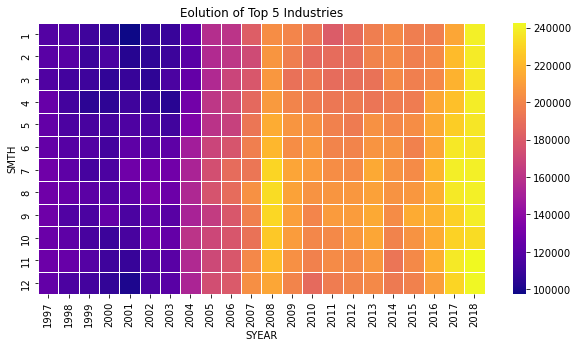

In [24]:
construction = Output_df[Output_df['LMO_Detailed_Industry'] == 'Construction']
construction_A = pd.crosstab(construction.SMTH, construction.SYEAR, values = construction.EMPLOYMENT, aggfunc = 'sum')

plt.figure(figsize=(10,5))
sns.heatmap(construction_A,  cmap = 'plasma',linewidths = 0.5)
plt.title('Eolution of Top 5 Industries')
construction_A

2004 is the center of transformation in employement as before it employement is under 140k and it increase throght years to be 240k in 2018 


### what is the largest year in number of employeement?

In [40]:
maxAndMinEmp = Output_df['EMPLOYMENT'].agg(['max','min'])
maxAndMinEmp
Output_df['EMPLOYMENT'].max
maxAndMinEmp

max    118000.0
min      1750.0
Name: EMPLOYMENT, dtype: float64

In [39]:
Output_df[Output_df['EMPLOYMENT'] == maxAndMinEmp]

ValueError: Can only compare identically-labeled Series objects

Construction industry hase 118000 number of employee in year 1997

In [38]:
Output_df[Output_df['EMPLOYMENT'] == 250.0]

,SYEAR,SMTH,LMO_Detailed_Industry,EMPLOYMENT,NAICS_Codes
DATE,,,,,


Heritage institutions,Oil and gas extraction ,Fishing, hunting and trapping is the minimum in all industries

### What is the average employment for each industry during the years?

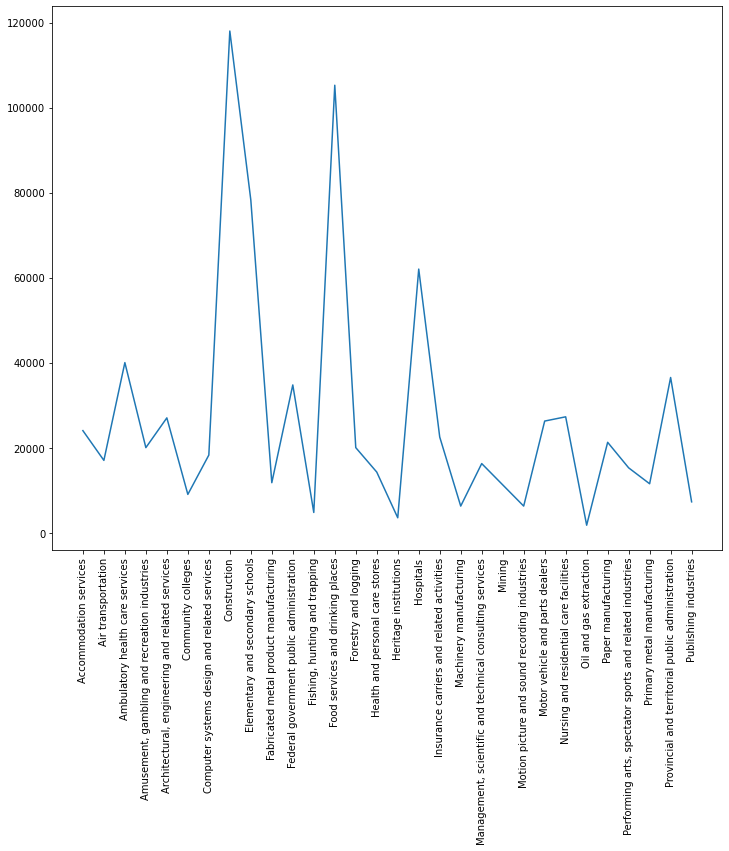

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
Output_df = Output_df.head(30)
ax.plot(pd.crosstab(Output_df['LMO_Detailed_Industry'], [Output_df['SYEAR']], values = Output_df['EMPLOYMENT'], aggfunc='mean'))

plt.xticks(rotation='vertical')

plt.show()

In [32]:
pd.crosstab(Output_df.LMO_Detailed_Industry, Output_df.SYEAR, values = Output_df.EMPLOYMENT, aggfunc='mean')


SYEAR,1997
LMO_Detailed_Industry,
Accommodation services,24000.0
Air transportation,17000.0
Ambulatory health care services,40000.0
"Amusement, gambling and recreation industries",20000.0
"Architectural, engineering and related services",27000.0
Community colleges,9000.0
Computer systems design and related services,18250.0
Construction,118000.0
Elementary and secondary schools,78250.0


There is a simple change in agarage of employemnt every year 

### what is the large number of employee?

In [35]:
maxAndMinEmp = Output_df['EMPLOYMENT'].agg(['max','min'])
maxAndMinEmp

max    118000.0
min      1750.0
Name: EMPLOYMENT, dtype: float64

large number of employee is 118000.0 and min is 1750.0